In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from imblearn import under_sampling,over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score




/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('/content/Strokesdataset (1).csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [ ]:
data=data.drop(['id'],axis=1)
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [ ]:
 data.stroke.value_counts()

0    42617
1      783
Name: stroke, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             43400 non-null  object 
 1   age                43400 non-null  float64
 2   hypertension       43400 non-null  int64  
 3   heart_disease      43400 non-null  int64  
 4   ever_married       43400 non-null  object 
 5   work_type          43400 non-null  object 
 6   Residence_type     43400 non-null  object 
 7   avg_glucose_level  43400 non-null  float64
 8   bmi                41938 non-null  float64
 9   smoking_status     30108 non-null  object 
 10  stroke             43400 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 3.6+ MB


In [ ]:
data.isnull().sum()
data.describe()
data['smoking_status'].value_counts()

never smoked       16053
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

In [ ]:
data['smoking_status'].isnull().mean()


0.3062672811059908

In [ ]:
data['smoking_status'].mode()

0    never smoked
dtype: object

In [ ]:
data['bmi'].isnull().mean()

0.03368663594470046

In [ ]:
data.duplicated().sum()

0

In [ ]:
data[data['smoking_status'].isnull()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
5,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,NaN,0
10,Female,79.0,0,0,Yes,Govt_job,Urban,77.08,35.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
43382,Female,9.0,0,0,No,children,Urban,68.49,16.8,NaN,0
43385,Female,66.0,0,0,Yes,Self-employed,Urban,92.10,24.8,NaN,0
43389,Male,14.0,0,0,No,children,Urban,82.48,24.8,NaN,0
43391,Male,6.0,0,0,No,children,Urban,77.48,19.1,NaN,0


In [ ]:
data.dropna(how='any',inplace=True)


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 29072 entries, 1 to 43399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             29072 non-null  object 
 1   age                29072 non-null  float64
 2   hypertension       29072 non-null  int64  
 3   heart_disease      29072 non-null  int64  
 4   ever_married       29072 non-null  object 
 5   work_type          29072 non-null  object 
 6   Residence_type     29072 non-null  object 
 7   avg_glucose_level  29072 non-null  float64
 8   bmi                29072 non-null  float64
 9   smoking_status     29072 non-null  object 
 10  stroke             29072 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 2.7+ MB


In [ ]:
data.stroke.value_counts()

0    28524
1      548
Name: stroke, dtype: int64

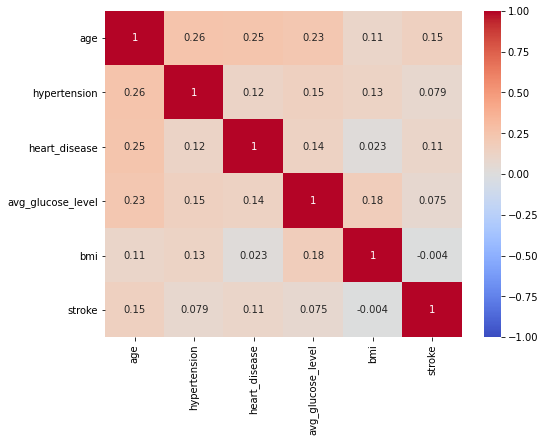

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(),vmin=-1, cmap='coolwarm', annot=True)

In [ ]:
columns_selected = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
data = pd.get_dummies(data=data, columns=columns_selected)
data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1,58.0,1,0,87.96,39.2,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
3,70.0,0,0,69.04,35.9,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0
6,52.0,0,0,77.59,17.7,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0
7,75.0,0,1,243.53,27.0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0
8,32.0,0,0,77.67,32.3,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,10.0,0,0,58.64,20.4,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0
43396,56.0,0,0,213.61,55.4,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0
43397,82.0,1,0,91.94,28.9,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0
43398,40.0,0,0,99.16,33.2,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0


In [ ]:
X = data.drop('stroke', axis='columns')
y = data['stroke']

In [ ]:
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1,58.0,1,0,87.96,39.2,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
3,70.0,0,0,69.04,35.9,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0
6,52.0,0,0,77.59,17.7,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0
7,75.0,0,1,243.53,27.0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0
8,32.0,0,0,77.67,32.3,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,10.0,0,0,58.64,20.4,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0
43396,56.0,0,0,213.61,55.4,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0
43397,82.0,1,0,91.94,28.9,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0
43398,40.0,0,0,99.16,33.2,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0


In [ ]:
y

1        0
3        0
6        0
7        0
8        0
        ..
43395    0
43396    0
43397    0
43398    0
43399    0
Name: stroke, Length: 29072, dtype: int64

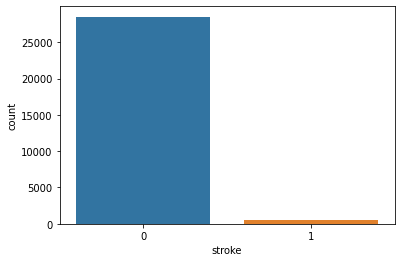

In [ ]:
sns.countplot(x='stroke', data=data)

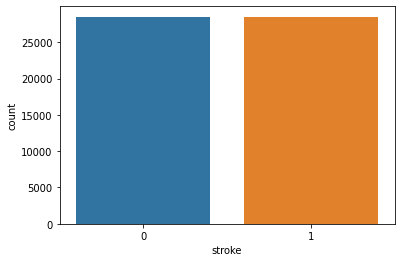

In [ ]:
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

y = pd.DataFrame({'stroke':y})
sns.countplot(data= y, x = 'stroke' )
plt.show()


In [ ]:
#y_sm.values.ravel()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =47,stratify=y)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int (x) for x in np.linspace(start=200,stop=1000,num=5)]
max_features=['auto','sqrt','log2']
max_depth=[int (x) for x in np.linspace(10,1000,5)]
min_samples_split=[2,5,10]
min_samples_leaf=[1,2,4]
random_grid={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 257, 505, 752, 1000], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'criterion': ['entropy', 'gini']}


In [ ]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=50,cv=5,
                               verbose=2,random_state=100,n_jobs=-1)
rf_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 51.6min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 87.8min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_randomcv.best_params_
rf_randomcv.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=257, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
best_random_grid=rf_randomcv.best_estimator_

In [ ]:
y_pred=best_random_grid.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 1, 0])

In [ ]:
print(confusion_matrix(y_test,y_pred))
print("Accuracy: ",accuracy_score(y_test,y_pred))

[[5702    3]
 [  91 5614]]
Accuracy:  0.9917616126205083


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5705
           1       1.00      0.98      0.99      5705

    accuracy                           0.99     11410
   macro avg       0.99      0.99      0.99     11410
weighted avg       0.99      0.99      0.99     11410



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k=np.random.randint(1,70,50)
parameter={'n_neighbors': k}
parameter


{'n_neighbors': array([65, 49, 15, 68, 67,  6, 60, 55, 36, 31, 14, 64, 65, 51, 10, 21, 24,
         2, 26, 14, 66, 16, 35, 33, 59, 46, 59, 65, 46, 23, 16,  8, 37, 28,
         1, 39,  5, 15, 68, 35, 45, 49,  1, 29, 49, 23, 40, 12,  2, 34])}

In [ ]:
knn_2 = KNeighborsClassifier()
k_randomcv=RandomizedSearchCV(estimator=knn_2,param_distributions=parameter,n_iter=50,cv=3,
                               verbose=1,random_state=100,n_jobs=-1)
k_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  3.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=50, n_jobs=-1,
                   param_distributions={'n_neighbors': array([65, 49, 15, 68, 67,  6, 60, 55, 36, 31, 14, 64, 65, 51, 10, 21, 24,
        2, 26, 14, 66, 16, 35, 33, 59, 46, 59, 65, 46, 23, 16,  8, 37, 28,
        1, 39,  5, 15, 68, 35, 45, 49,  1, 29, 49, 23, 40, 12,  2, 34])},
                   pre_dispatch='2*n_jobs', random_state=100, refit=True,
                   return_train_score=False, scoring=None, verbose=1)

In [ ]:
k_randomcv.best_params_

{'n_neighbors': 2}

In [ ]:
k_randomcv.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [ ]:
best_parameter=k_randomcv.best_estimator_

In [ ]:
y_pred=best_parameter.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 1, 0])

In [ ]:
print(confusion_matrix(y_test,y_pred))
print("Accuracy: ",accuracy_score(y_test,y_pred))

[[5161  544]
 [  46 5659]]
Accuracy:  0.9482909728308502


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.90      0.95      5705
           1       0.91      0.99      0.95      5705

    accuracy                           0.95     11410
   macro avg       0.95      0.95      0.95     11410
weighted avg       0.95      0.95      0.95     11410



In [ ]:
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
logistic = linear_model.LogisticRegression(max_iter=6000)

C = np.logspace(0, 10, num=10)
penalty = ['l1', 'l2']
solver = ['liblinear', 'saga']

hyperparameters = dict(C=C, penalty=penalty, solver=solver)
hyperparameters 

{'C': array([1.00000000e+00, 1.29154967e+01, 1.66810054e+02, 2.15443469e+03,
        2.78255940e+04, 3.59381366e+05, 4.64158883e+06, 5.99484250e+07,
        7.74263683e+08, 1.00000000e+10]),
 'penalty': ['l1', 'l2'],
 'solver': ['liblinear', 'saga']}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
lr_randomcv= RandomizedSearchCV(logistic, hyperparameters,cv=5,n_iter=40,n_jobs=-1,verbose=2)
lr_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 67.1min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 85.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=6000,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=40, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e+00, 1.29154967e+01, 1.66810054e+02, 2.15443469e+03,
       2.78255940e+04, 3.59381366e+05, 4.64158883e+06, 5.99484250e+07,
       7.74263683e+08, 1.00000000e+10]),
                                        'penalty': ['l

In [ ]:
lr_randomcv.best_params_

{'C': 10000000000.0, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
lr_randomcv.best_estimator_

LogisticRegression(C=10000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=6000, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
best_hyperparameters=lr_randomcv.best_estimator_

In [ ]:
y_pred=best_hyperparameters.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
print(confusion_matrix(y_test,y_pred))
print("Accuracy: ",accuracy_score(y_test,y_pred))

[[4225 1480]
 [1129 4576]]
Accuracy:  0.7713409290096407


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76      5705
           1       0.76      0.80      0.78      5705

    accuracy                           0.77     11410
   macro avg       0.77      0.77      0.77     11410
weighted avg       0.77      0.77      0.77     11410



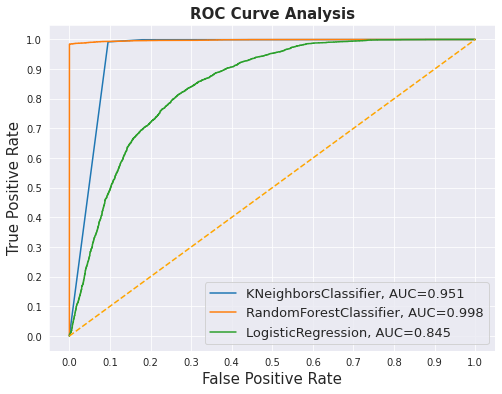

In [ ]:

import seaborn as sns
from sklearn.linear_model import LogisticRegression
classifiers =  [ KNeighborsClassifier(n_neighbors=2),
               RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=257, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False),
                LogisticRegression(C=10000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=6000, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)]
              
                
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr', 'tpr', 'auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::, 1]

    fpr, tpr, _ = roc_curve(y_test, yproba)
    auc = roc_auc_score(y_test, yproba)

    result_table = result_table.append({'classifiers': cls.__class__.__name__,
                                        'fpr': fpr,
                                        'tpr': tpr,
                                        'auc': auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8, 6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0, 1], [0, 1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size': 13}, loc='lower right')

plt.show()

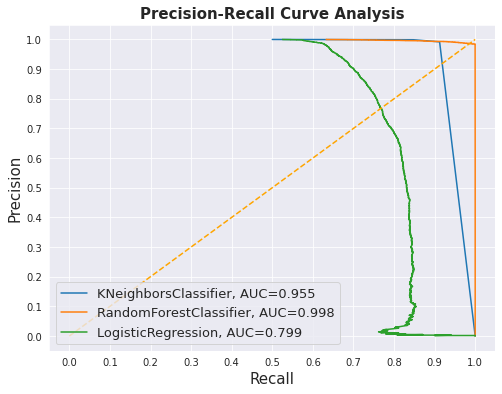

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score, auc
classifiers = [ KNeighborsClassifier(n_neighbors=2),
               RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=257, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False),
                LogisticRegression(C=10000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=6000, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)]
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'lr_precision', 'lr_recall', 'lr_auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[:, 1]
    yhat = model.predict(X_test)

    lr_precision, lr_recall, _ = precision_recall_curve(y_test, yproba)
    lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)

    result_table = result_table.append({'classifiers': cls.__class__.__name__,
                                        'lr_precision': lr_precision,
                                        'lr_recall': lr_recall,
                                        'lr_auc': lr_auc}, ignore_index=True)
    # Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)
sns.set_style("darkgrid")
fig = plt.figure(figsize=(8, 6))
for i in result_table.index:
    plt.plot(result_table.loc[i]['lr_precision'],
             result_table.loc[i]['lr_recall'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['lr_auc']))

plt.plot([0, 1], [0, 1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Recall", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Precision", fontsize=15)

plt.title('Precision-Recall Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size': 13}, loc='lower left')

plt.show()